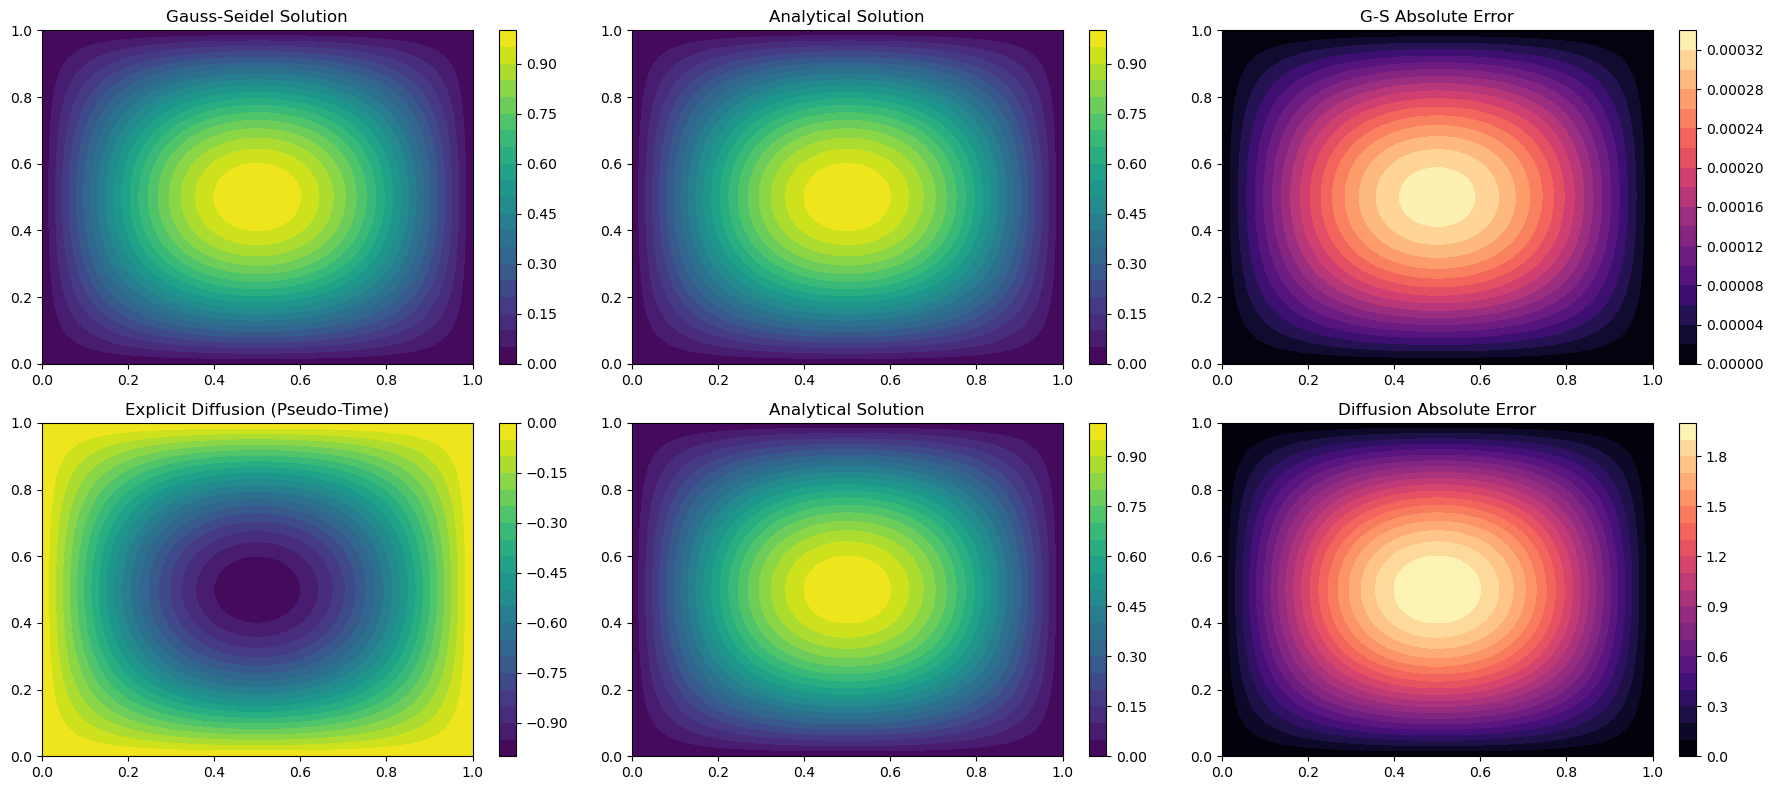

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# 设置网格参数
nx, ny = 50, 50
Lx, Ly = 1.0, 1.0
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y, indexing='ij')

# 构造泊松方程右端项 f(x,y) 和解析解
def rhs_func(x, y):
    return -2 * (np.pi ** 2) * np.sin(np.pi * x) * np.sin(np.pi * y)

def analytical_solution(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

# 初始化变量
f = rhs_func(X, Y)

p_exact = analytical_solution(X, Y)

# Jacobi 方法参数
tol = 1e-6
max_iter = 5000
error = 1.0




# Gauss-Seidel 方法解泊松方程
p_gs = np.zeros_like(f)
error_gs = 1.0
for it in range(max_iter):
    p_old = p_gs.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            p_gs[i, j] = 0.25 * (
                p_gs[i+1, j] + p_gs[i-1, j] +
                p_gs[i, j+1] + p_gs[i, j-1] -
                f[i, j] * dx * dy
            )
    # Dirichlet 边界条件
    p_gs[0, :] = p_gs[-1, :] = 0
    p_gs[:, 0] = p_gs[:, -1] = 0

    error_gs = np.linalg.norm(p_gs - p_old, ord=2)
    if error_gs < tol:
        break

# 显式扩散方法（伪时间推进）
p_diff = np.zeros_like(f)
alpha = 0.25 * min(dx, dy)**2  # 稳定性约束
dt = alpha
error_diff = 1.0
for it in range(50000):  # 扩散需要更多迭代
    p_old = p_diff.copy()
    p_diff[1:-1, 1:-1] += dt * (
        (p_old[2:, 1:-1] - 2 * p_old[1:-1, 1:-1] + p_old[0:-2, 1:-1]) / dx**2 +
        (p_old[1:-1, 2:] - 2 * p_old[1:-1, 1:-1] + p_old[1:-1, 0:-2]) / dy**2 +
        f[1:-1, 1:-1]
    )
    # Dirichlet 边界条件
    p_diff[0, :] = p_diff[-1, :] = 0
    p_diff[:, 0] = p_diff[:, -1] = 0

    if it % 100 == 0:
        error_diff = np.linalg.norm(p_diff - p_old, ord=2)
        if error_diff < tol:
            break

# 可视化结果对比
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

# Gauss-Seidel
cs0 = axs[0, 0].contourf(X, Y, p_gs, 20, cmap='viridis')
fig.colorbar(cs0, ax=axs[0, 0])
axs[0, 0].set_title("Gauss-Seidel Solution")

cs1 = axs[0, 1].contourf(X, Y, p_exact, 20, cmap='viridis')
fig.colorbar(cs1, ax=axs[0, 1])
axs[0, 1].set_title("Analytical Solution")

cs2 = axs[0, 2].contourf(X, Y, np.abs(p_gs - p_exact), 20, cmap='magma')
fig.colorbar(cs2, ax=axs[0, 2])
axs[0, 2].set_title("G-S Absolute Error")

# 显式扩散
cs3 = axs[1, 0].contourf(X, Y, p_diff, 20, cmap='viridis')
fig.colorbar(cs3, ax=axs[1, 0])
axs[1, 0].set_title("Explicit Diffusion (Pseudo-Time)")

cs4 = axs[1, 1].contourf(X, Y, p_exact, 20, cmap='viridis')
fig.colorbar(cs4, ax=axs[1, 1])
axs[1, 1].set_title("Analytical Solution")

cs5 = axs[1, 2].contourf(X, Y, np.abs(p_diff - p_exact), 20, cmap='magma')
fig.colorbar(cs5, ax=axs[1, 2])
axs[1, 2].set_title("Diffusion Absolute Error")

plt.tight_layout()
plt.show()
